## libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading data

In [33]:
data = pd.read_csv('covid.csv')
data.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0


## collection and visulaization

In [34]:
X = data.groupby('Date',sort=False,as_index=False).sum()

In [35]:
X.head()

,Date,Sno,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,30/01/20,1,1,0,0,0
1,31/01/20,2,1,0,0,0
2,01/02/20,3,2,0,0,0
3,02/02/20,4,3,0,0,0
4,03/02/20,5,3,0,0,0


In [36]:
X.drop('Sno',axis=1,inplace=True)

In [37]:
X.head()

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,30/01/20,1,0,0,0
1,31/01/20,1,0,0,0
2,01/02/20,2,0,0,0
3,02/02/20,3,0,0,0
4,03/02/20,3,0,0,0


## Total cases

In [38]:
X['total'] = X.sum(axis=1)

In [39]:
X.head()

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,total
0,30/01/20,1,0,0,0,1
1,31/01/20,1,0,0,0,1
2,01/02/20,2,0,0,0,2
3,02/02/20,3,0,0,0,3
4,03/02/20,3,0,0,0,3


## Visualization

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51],
 <a list of 52 Text xticklabel objects>)

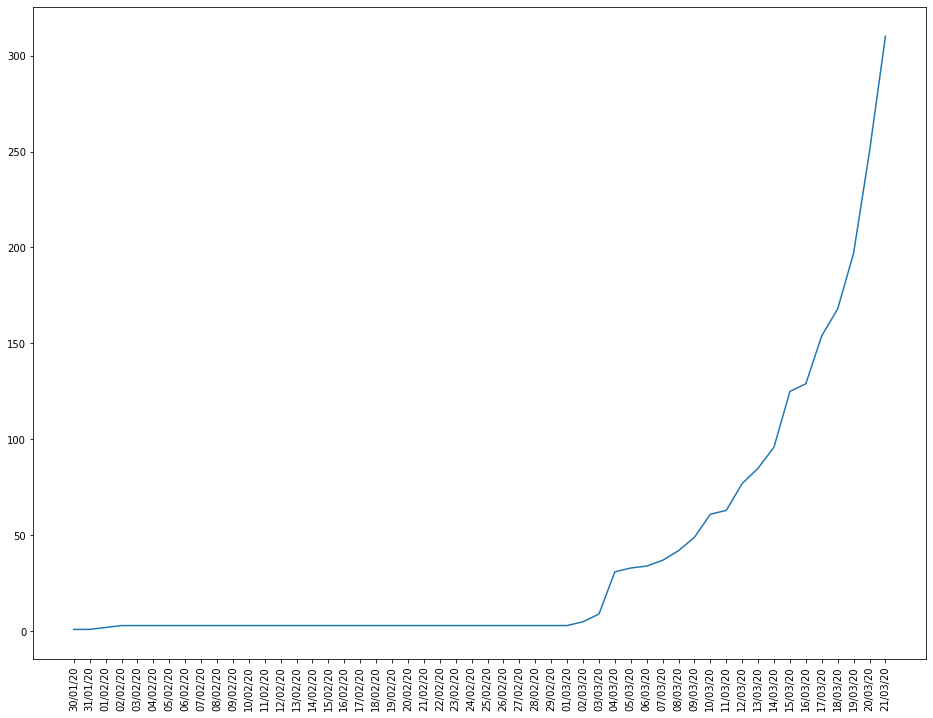

In [41]:
plt.figure(figsize=(16,12))
plt.plot(X['Date'],X['total'])
plt.xticks(rotation=90)

In [56]:
X.head()

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,total
0,30/01/20,1,0,0,0,1
1,31/01/20,1,0,0,0,1
2,01/02/20,2,0,0,0,2
3,02/02/20,3,0,0,0,3
4,03/02/20,3,0,0,0,3


## Modelling

In [55]:
r = 0.0   
start_date = X.index[X['Date'] == '04/03/20'][0]
end_date = X.index[X['Date'] == '21/03/20'][0]
for i in range(start_date,end_date):
    curr_day_cases = X.iloc[i]['total']
    next_day_cases = X.iloc[i + 1]['total']
    daily_rate = (next_day_cases - curr_day_cases) / curr_day_cases
    r += daily_rate
r /= (end_date - start_date)

In [57]:
P_o =  31
t = 26
P_t = P_o * np.exp(r*t)

In [58]:
P_t

1459.4810275382426